In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
def parser(time_data):
    return pd.datetime.strptime('2017-'+time_data,'%Y-%d-%m %H:%M:%S')
data3 = pd.read_csv('../data/namenode_1130.csv',index_col=0, parse_dates=[0], date_parser=parser)

In [8]:
data = data3.rename(columns={'cpu process':'top_cpu','memory process':'top_mem'})
data['top_cpu'] = data['top_cpu'].str.partition('/')[0]
data['top_mem'] = data['top_mem'].str.partition('/')[0]

In [13]:
data.columns.values

array(['usr', 'sys', 'idl', 'wai', 'hiq', 'siq', 'used', 'buff', 'cach',
       'free', 'recv', 'send', 'read', 'writ', 'top_cpu', 'top_mem'], dtype=object)

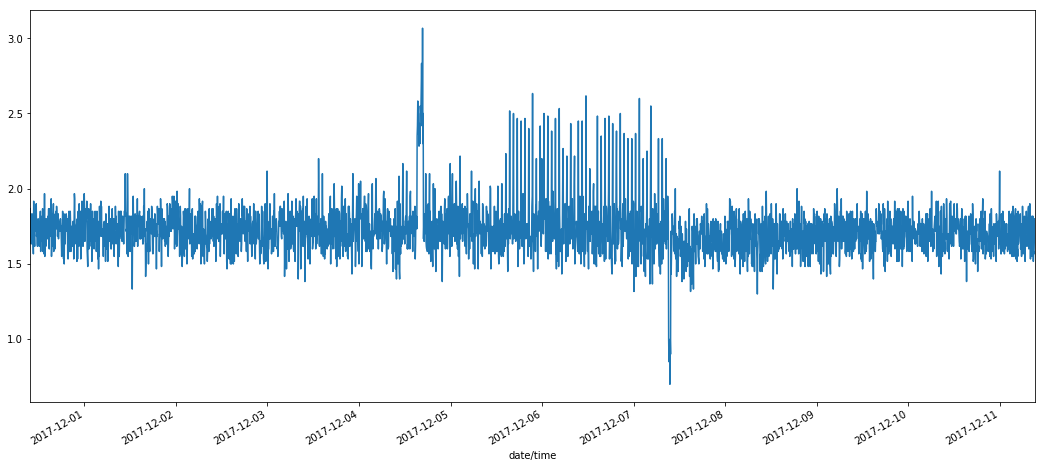

In [29]:
data[::5].writ.plot()
plt.gcf().set_size_inches(18,8)
plt.show()